### Polynomial Regression 이해

PolynomialFeatures 클래스로 다항식 변환

```python
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3                   # -3에서 3 사이의 임의의 값 100개
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)   # 2차 함수 활용. 잡음 추가됨.

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()
```

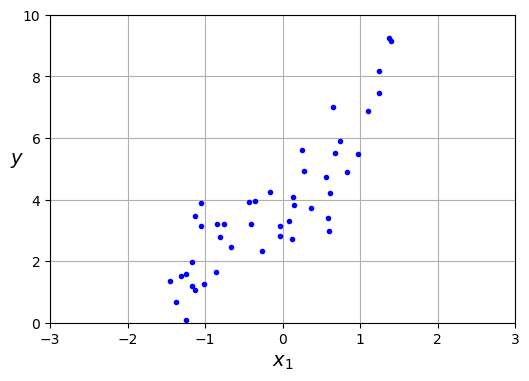

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3                   # -3에서 3 사이의 임의의 값 100개
y = X**3 + 0.5 * X ** 2 + X + 4 + np.random.randn(m, 1)   # 2차 함수 활용. 잡음 추가됨. y = 0.5x^2 + x + 2

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

**사이킷런의 `PolynomialFeatures` 변환기**

지정된 차수까지 필요한 고차항을 새로운 특성으로 추가한다.

```python
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
```

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

```python
poly_features.fit_transform([[1], [6], [4]])
```

In [5]:
poly_features.fit_transform([[5]]) # x1 : 5 // x1 , x1^2 5, 25

array([[ 5., 25.]])

```python
poly_features.fit_transform([[1, 3], [6, 5], [4, 8]])
```

In [6]:
poly_features.fit_transform([[3,5]]) # x1 : 1, x2 : 3 / x1^2 : 1, x2^2 : 9, x1*x2 : 3

array([[ 3.,  5.,  9., 15., 25.]])

```python
X_poly = poly_features.fit_transform(X)
```

In [7]:
X_poly = poly_features.fit_transform(X)

In [8]:
X_poly

array([[-7.52759287e-01,  5.66646544e-01],
       [ 2.70428584e+00,  7.31316190e+00],
       [ 1.39196365e+00,  1.93756281e+00],
       [ 5.91950905e-01,  3.50405874e-01],
       [-2.06388816e+00,  4.25963433e+00],
       [-2.06403288e+00,  4.26023172e+00],
       [-2.65149833e+00,  7.03044338e+00],
       [ 2.19705687e+00,  4.82705891e+00],
       [ 6.06690070e-01,  3.68072842e-01],
       [ 1.24843547e+00,  1.55859111e+00],
       [-2.87649303e+00,  8.27421218e+00],
       [ 2.81945911e+00,  7.94934969e+00],
       [ 1.99465584e+00,  3.97865194e+00],
       [-1.72596534e+00,  2.97895634e+00],
       [-1.90905020e+00,  3.64447265e+00],
       [-1.89957294e+00,  3.60837736e+00],
       [-1.17454654e+00,  1.37955958e+00],
       [ 1.48538590e-01,  2.20637127e-02],
       [-4.08329888e-01,  1.66733298e-01],
       [-1.25262516e+00,  1.56906979e+00],
       [ 6.71117368e-01,  4.50398522e-01],
       [-2.16303684e+00,  4.67872835e+00],
       [-1.24713211e+00,  1.55533850e+00],
       [-8.

```python
X[0]  # [x1]
```

In [9]:
X[0]

array([-0.75275929])

```python
X_poly[0]  # [x1, x2]
```

In [10]:
X_poly[0]

array([-0.75275929,  0.56664654])

이제 선형 회귀 모델을 적용하면 적절한 절편 $\theta_0$ 과 가중치$\theta_1$ 과 $\theta_2$ 를 얻는다.

-  `intercept_` 인스턴스 변수: 절편 $\theta_0$
- `coef_` 인스턴스 변수: 가중치 $\theta_1$ 과 $\theta_2$

```python
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
```

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.95942377]), array([[6.33796289, 0.47533093]]))

In [ ]:
# bias , w1, w2

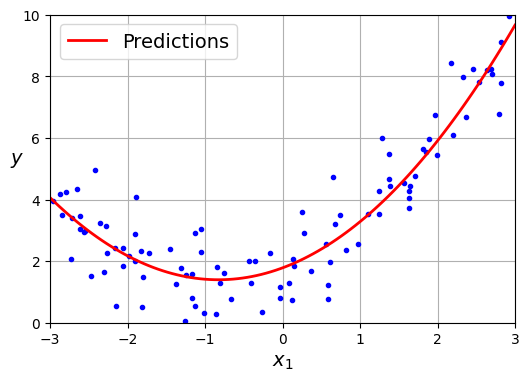

In [17]:
# 2차 함수 그래프 그리기
X_new = np.linspace(-3, 3, 100).reshape(100, 1)  # x1 값: -3에서 3 사이를 100등분해서 얻어지는 값.
X_new_poly = poly_features.transform(X_new)      # x1**2 추가
y_new = lin_reg.predict(X_new_poly)              # 예측 타깃값

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")  # 2차 함수 그래프
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

### Polynomial Regression을 이용한 Underfitting, Overfitting 이해
* 사이킷런의 아래 문서에서 예제를 차용함
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

**cosine 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만듬**

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

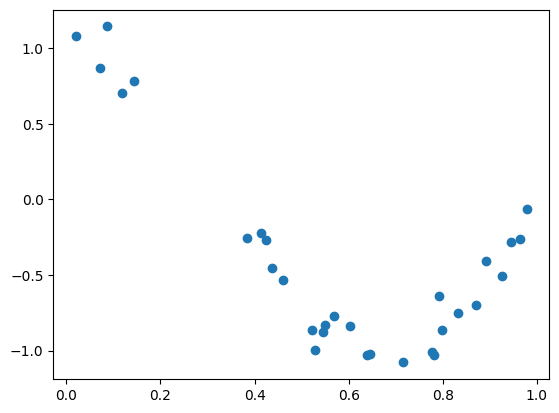

In [19]:
plt.scatter(X, y)


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56 입니다.


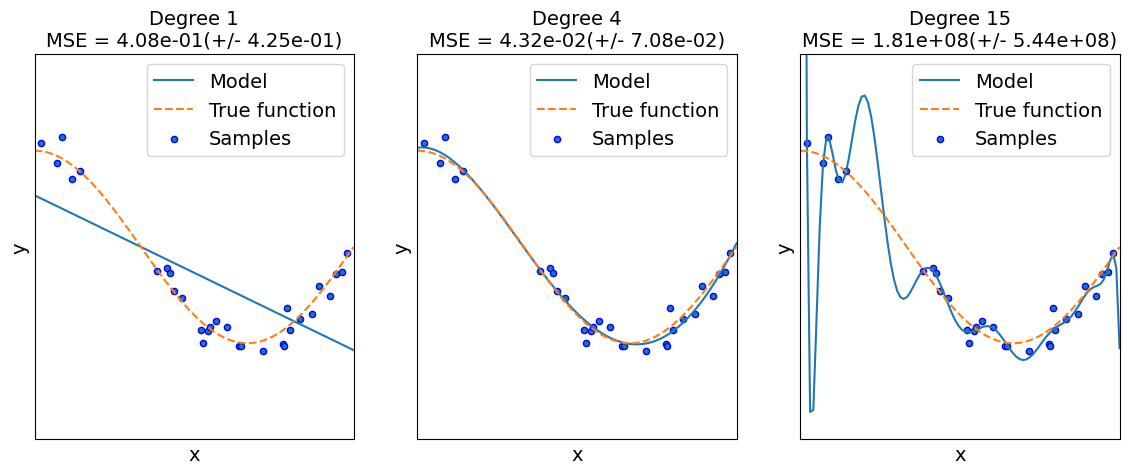

In [20]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()